In [55]:
import numpy as np
import pandas as pd
import seaborn as sb
import plotly.express as px
import matplotlib.pyplot as mpl
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split

In [56]:
movie = pd.read_csv("D:\data analyst projects\movieprediction.csv",encoding = 'latin2')

In [20]:
movie.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,-2021.0,90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,-2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,-2010.0,105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [21]:
movie.head(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,-2021.0,90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,-2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,-2010.0,105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,...Aur Pyaar Ho Gaya,-1997.0,147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,-2005.0,142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
7,.in for Motion,-2008.0,59 min,Documentary,NaN,NaN,Anirban Datta,NaN,NaN,NaN
8,?: A Question Mark,-2012.0,82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,-2014.0,116 min,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon


In [22]:
movie.describe()

,Year,Rating
count,14981.000000,7919.000000
mean,-1987.012215,5.841621
std,25.416689,1.381777
min,-2022.000000,1.100000
25%,-2009.000000,4.900000
50%,-1991.000000,6.000000
75%,-1968.000000,6.800000
max,-1913.000000,10.000000


In [23]:
movie.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [24]:
movie.isnull().sum().sum()

33523

In [25]:
movie.dtypes


Name         object
Year        float64
Duration     object
Genre        object
Rating      float64
Votes        object
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

In [26]:
movie.shape


(15509, 10)

In [28]:
movie.dropna(inplace = True)

In [29]:
movie.head(11)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,-2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,-1997.0,147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,-2005.0,142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,-2012.0,82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,-2014.0,116 min,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon
10,1:1.6 An Ode to Lost Love,-2004.0,96 min,Drama,6.2,17,Madhu Ambat,Rati Agnihotri,Gulshan Grover,Atul Kulkarni
11,1:13:7 Ek Tera Saath,-2016.0,120 min,Horror,5.9,59,Arshad Siddiqui,Pankaj Berry,Anubhav Dhir,Hritu Dudani
12,100 Days,-1991.0,161 min,"Horror, Romance, Thriller",6.5,983,Partho Ghosh,Jackie Shroff,Madhuri Dixit,Javed Jaffrey
13,100% Love,-2012.0,166 min,"Comedy, Drama, Romance",5.7,512,Rabi Kinagi,Jeet,Koyel Mallick,Sujoy Ghosh


In [30]:
movie.isnull().sum()


Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [31]:
movie.isnull().sum().sum()

0

In [33]:
movie.shape

(5659, 10)

In [34]:
movie['Duration'] = movie['Duration'].str.extract('(\d+)')
movie['Duration'] = pd.to_numeric(movie['Duration'], errors='coerce')

In [35]:
movie["Year"].head()

1   -2019.0
3   -2019.0
5   -1997.0
6   -2005.0
8   -2012.0
Name: Year, dtype: float64

In [37]:
genre = movie['Genre']


In [38]:
genre.head(11)

1                         Drama
3               Comedy, Romance
5        Comedy, Drama, Musical
6           Drama, Romance, War
8     Horror, Mystery, Thriller
9       Action, Crime, Thriller
10                        Drama
11                       Horror
12    Horror, Romance, Thriller
13       Comedy, Drama, Romance
15                Comedy, Drama
Name: Genre, dtype: object

In [58]:
genres = movie['Genre'].str.split(', ', expand=True)


In [59]:
genres.head(11)

,0,1,2
0,Drama,None,None
1,Drama,None,None
2,Drama,Musical,None
3,Comedy,Romance,None
4,Drama,None,None
5,Comedy,Drama,Musical
6,Drama,Romance,War
7,Documentary,None,None
8,Horror,Mystery,Thriller
9,Action,Crime,Thriller


In [40]:
genre_counts = {}
for genre in genre.values.flatten():
    if genre is not None:
        if genre in genre_counts:
            genre_counts[genre] += 1
        else:
            genre_counts[genre] = 1

genereCounts = {genre: count for genre, count in sorted(genre_counts.items())}
for genre, count in genereCounts.items():
    print(f"{genre}: {count}")

Action: 170
Action, Adventure: 17
Action, Adventure, Biography: 1
Action, Adventure, Comedy: 37
Action, Adventure, Crime: 9
Action, Adventure, Drama: 43
Action, Adventure, Family: 2
Action, Adventure, Fantasy: 11
Action, Adventure, History: 1
Action, Adventure, Horror: 1
Action, Adventure, Musical: 3
Action, Adventure, Mystery: 1
Action, Adventure, Romance: 5
Action, Adventure, Sci-Fi: 6
Action, Adventure, Thriller: 18
Action, Biography, Crime: 8
Action, Biography, Drama: 12
Action, Comedy: 24
Action, Comedy, Crime: 74
Action, Comedy, Drama: 118
Action, Comedy, Fantasy: 4
Action, Comedy, Horror: 1
Action, Comedy, Musical: 7
Action, Comedy, Mystery: 2
Action, Comedy, Romance: 27
Action, Comedy, Thriller: 6
Action, Comedy, War: 1
Action, Crime: 18
Action, Crime, Drama: 329
Action, Crime, Family: 1
Action, Crime, Fantasy: 1
Action, Crime, History: 1
Action, Crime, Horror: 1
Action, Crime, Musical: 3
Action, Crime, Mystery: 4
Action, Crime, Romance: 10
Action, Crime, Sci-Fi: 1
Action, Crim

In [60]:
genresPie = movie['Genre'].value_counts()


In [61]:
genresPie.head(11)

Drama                   2780
Action                  1289
Thriller                 779
Romance                  708
Drama, Romance           524
Comedy                   495
Action, Crime, Drama     455
Drama, Family            418
Horror                   322
Action, Drama            316
Documentary              283
Name: Genre, dtype: int64

In [62]:
genrePie = pd.DataFrame(list(genresPie.items()))
genrePie = genrePie.rename(columns={0: 'Genre', 1: 'Count'})


In [63]:
genrePie.head(11)

,Genre,Count
0,Drama,2780
1,Action,1289
2,Thriller,779
3,Romance,708
4,"Drama, Romance",524
5,Comedy,495
6,"Action, Crime, Drama",455
7,"Drama, Family",418
8,Horror,322
9,"Action, Drama",316


In [44]:
movie["Director"].nunique()

2431

In [45]:
directors = movie["Director"].value_counts()

In [46]:
directors.head(11)

David Dhawan            41
Mahesh Bhatt            39
Ram Gopal Varma         33
Hrishikesh Mukherjee    33
Shakti Samanta          33
Vikram Bhatt            30
Priyadarshan            29
Basu Chatterjee         23
Rama Rao Tatineni       23
Shyam Benegal           22
Yash Chopra             22
Name: Director, dtype: int64

In [49]:
actors = pd.concat([movie['Actor 1'], movie['Actor 2'], movie['Actor 3']]).dropna().value_counts()

In [50]:
actors.head(11)

Mithun Chakraborty    160
Amitabh Bachchan      148
Dharmendra            146
Ashok Kumar           124
Akshay Kumar          120
Shashi Kapoor         117
Jeetendra             116
Sanjay Dutt           101
Rekha                  92
Ajay Devgn             92
Govinda                90
dtype: int64

In [64]:
sb.set(style = "darkgrid", font = "Calibri")


TypeError: 'float' object cannot be interpreted as an integer

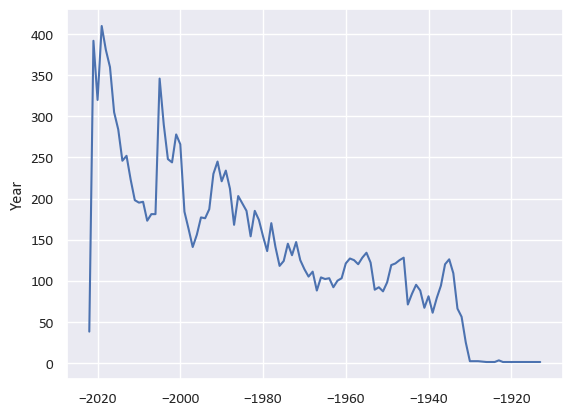

In [66]:
sb.set(style = "darkgrid", font = "Calibri")
ax = sb.lineplot(data=movie['Year'].value_counts().sort_index())
darkgrid_positions = range(min(movie['Year']), max(movie['Year']) + 1, 5)
ax.set_title("Annual Movie Release Counts Over Time")
ax.set_darkgrid(darkgrid_positions)
ax.set_darkgridlabels(darkgrid_positions, rotation = 90)
ax.set_xlabel("Years")
ax.set_ylabel("Count")
mpl.show()

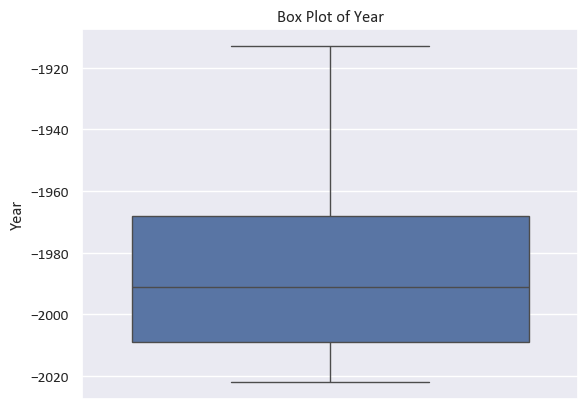

In [71]:
ax = sb.boxplot(data=movie, y='Year')
ax.set_ylabel('Year')
ax.set_title('Box Plot of Year')
mpl.show()

In [76]:
Q1 = movie['Rating'].quantile(0.25)
Q3 = movie['Rating'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
movie_file = movie[(movie['Rating'] >= lower_bound) & (movie['Rating'] <= upper_bound)]
movie_file.head(16)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,-2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,-1997.0,147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,-2005.0,142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,-2012.0,82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,-2014.0,116 min,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon
10,1:1.6 An Ode to Lost Love,-2004.0,96 min,Drama,6.2,17,Madhu Ambat,Rati Agnihotri,Gulshan Grover,Atul Kulkarni
11,1:13:7 Ek Tera Saath,-2016.0,120 min,Horror,5.9,59,Arshad Siddiqui,Pankaj Berry,Anubhav Dhir,Hritu Dudani
12,100 Days,-1991.0,161 min,"Horror, Romance, Thriller",6.5,983,Partho Ghosh,Jackie Shroff,Madhuri Dixit,Javed Jaffrey
13,100% Love,-2012.0,166 min,"Comedy, Drama, Romance",5.7,512,Rabi Kinagi,Jeet,Koyel Mallick,Sujoy Ghosh


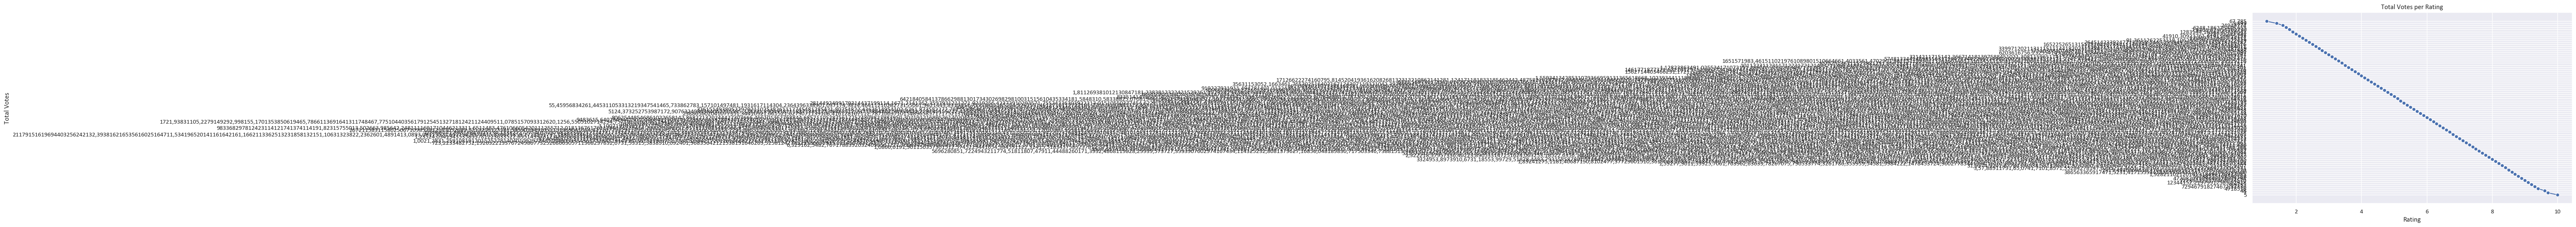

In [84]:
rating_votes = movie.groupby('Rating')['Votes'].sum().reset_index()
mpl.figure(figsize=(10, 6))
ax_line_seaborn = sb.lineplot(data=rating_votes, x='Rating', y='Votes', marker='o')
ax_line_seaborn.set_xlabel('Rating')
ax_line_seaborn.set_ylabel('Total Votes')
ax_line_seaborn.set_title('Total Votes per Rating')
mpl.show()


In [88]:
movie["Actor"] = movie['Actor 1'] + ', ' + movie['Actor 2'] + ', ' + movie_file['Actor 3']
movie["Directors"] = movie['Director'].astype('category').cat.codes
movie["Genres"] = movie['Genre'].astype('category').cat.codes
movie["Actors"] = movie['Actor'].astype('category').cat.codes

In [89]:
movie_file.head(16)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,-2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,-1997.0,147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,-2005.0,142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,-2012.0,82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,-2014.0,116 min,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon
10,1:1.6 An Ode to Lost Love,-2004.0,96 min,Drama,6.2,17,Madhu Ambat,Rati Agnihotri,Gulshan Grover,Atul Kulkarni
11,1:13:7 Ek Tera Saath,-2016.0,120 min,Horror,5.9,59,Arshad Siddiqui,Pankaj Berry,Anubhav Dhir,Hritu Dudani
12,100 Days,-1991.0,161 min,"Horror, Romance, Thriller",6.5,983,Partho Ghosh,Jackie Shroff,Madhuri Dixit,Javed Jaffrey
13,100% Love,-2012.0,166 min,"Comedy, Drama, Romance",5.7,512,Rabi Kinagi,Jeet,Koyel Mallick,Sujoy Ghosh


In [91]:
Input = movie.drop(['Name', 'Genre', 'Rating', 'Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Actor'], axis=1)
Output = movie['Rating']

In [92]:
Input.head(16)

,Year,Duration,Votes,Directors,Genres,Actors
0,NaN,NaN,NaN,1926,299,-1
1,-2019.0,109 min,8,1548,299,5258
2,-2021.0,90 min,NaN,5123,351,-1
3,-2019.0,110 min,35,3319,228,4525
4,-2010.0,105 min,NaN,385,299,-1
5,-1997.0,147 min,827,3800,197,1452
6,-2005.0,142 min,"1,086",4993,366,2791
7,-2008.0,59 min,NaN,475,262,-1
8,-2012.0,82 min,326,305,418,7458
9,-2014.0,116 min,11,987,38,1217


In [93]:
Output.head(16)

0     NaN
1     7.0
2     NaN
3     4.4
4     NaN
5     4.7
6     7.4
7     NaN
8     5.6
9     4.0
10    6.2
11    5.9
12    6.5
13    5.7
14    NaN
15    7.4
Name: Rating, dtype: float64